In [1]:
import hashlib

# try a md5 hash and apply it to string
def string2numeric_hash(text):
    return int(hashlib.md5(text.encode('utf-8')).hexdigest()[:8], 16)
 
# test
print (string2numeric_hash("this is a nice string"))
print (string2numeric_hash("loser"))

1962341389
1823841227


In [2]:
import pandas as pd
X_train = pd.read_csv("data/train")

In [3]:
X_test = pd.read_csv("data/test")

In [9]:
X_test.head().site_id

array(['235ba823', '1fbe01fe', '85f751fd'], dtype=object)

In [23]:
X_train['site_id_md5']=X_train.site_id.apply(string2numeric_hash)
X_train['site_domain_md5']=X_train.site_domain.apply(string2numeric_hash)
X_train['site_category_md5']=X_train.site_category.apply(string2numeric_hash)

X_train['app_id_md5']=X_train.app_id.apply(string2numeric_hash)
X_train['app_domain_md5']=X_train.app_domain.apply(string2numeric_hash)
X_train['app_category_md5']=X_train.app_category.apply(string2numeric_hash)

X_train['device_id_md5']=X_train.device_id.apply(string2numeric_hash)
X_train['device_ip_md5']=X_train.device_ip.apply(string2numeric_hash)
X_train['device_model_md5']=X_train.device_model.apply(string2numeric_hash)

In [24]:
X_train['weekday']= (X_train['hour']%10000/100).astype(int)%7
X_train['hour_']= (X_train['hour']%100)

In [26]:
tmp_features = X_train[['site_id_md5','site_domain_md5','site_category_md5',\
                        'app_id_md5','app_domain_md5','app_category_md5',\
                        'device_id_md5','device_ip_md5','device_model_md5',\
                        'weekday','hour_','banner_pos','C1','device_type','device_conn_type',\
                        'C14','C15','C16','C17','C18','C19','C20','C21']].values

In [27]:
labels = X_train.click.values

In [29]:
import xgboost as xgb
import numpy as np
param = {'max_depth':8, 'eta':0.1, 'silent':1, 'objective':'binary:logistic' ,'subsample':0.3}
param['nthread'] = 4
param['colsample_bytree'] = 0.5
param['eval_metric'] = 'logloss'

#msk = np.random.rand(len(X_train)) < 0.8
msk = np.load("20170727_msk.npy")

dtrain = xgb.DMatrix(tmp_features[msk], labels[msk])
dvali = xgb.DMatrix(tmp_features[~msk], labels[~msk])

In [ ]:
num_round = 80000
evallist  = [ (dtrain,'train'),(dvali,'eval')]
bst = xgb.train( param, dtrain, num_round, evallist , early_stopping_rounds=500)

[0]	train-logloss:0.647812	eval-logloss:0.647787
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 500 rounds.
[1]	train-logloss:0.610539	eval-logloss:0.610494
[2]	train-logloss:0.579611	eval-logloss:0.579554
[3]	train-logloss:0.553748	eval-logloss:0.553676
[4]	train-logloss:0.532526	eval-logloss:0.532445
[5]	train-logloss:0.514694	eval-logloss:0.5146
[6]	train-logloss:0.499411	eval-logloss:0.499308
[7]	train-logloss:0.486393	eval-logloss:0.486284
[8]	train-logloss:0.475453	eval-logloss:0.475336
[9]	train-logloss:0.46627	eval-logloss:0.466144
[10]	train-logloss:0.45812	eval-logloss:0.457992
[11]	train-logloss:0.451245	eval-logloss:0.451114
[12]	train-logloss:0.445616	eval-logloss:0.44548
[13]	train-logloss:0.440429	eval-logloss:0.440291
[14]	train-logloss:0.436026	eval-logloss:0.435887
[15]	train-logloss:0.43209	eval-logloss:0.431948
[16]	train-logloss:0.428883	eval-logloss:0.42874
[17]	train-loglos

[161]	train-logloss:0.397808	eval-logloss:0.39786
[162]	train-logloss:0.397781	eval-logloss:0.397833
[163]	train-logloss:0.397758	eval-logloss:0.397814
[164]	train-logloss:0.397731	eval-logloss:0.397789
[165]	train-logloss:0.397696	eval-logloss:0.397755
[166]	train-logloss:0.397659	eval-logloss:0.397721
[167]	train-logloss:0.397621	eval-logloss:0.397686
[168]	train-logloss:0.397594	eval-logloss:0.397658
[169]	train-logloss:0.397571	eval-logloss:0.397636
[170]	train-logloss:0.397551	eval-logloss:0.39762
[171]	train-logloss:0.397538	eval-logloss:0.397609
[172]	train-logloss:0.397512	eval-logloss:0.397584
[173]	train-logloss:0.397462	eval-logloss:0.397536
[174]	train-logloss:0.397378	eval-logloss:0.397454
[175]	train-logloss:0.397337	eval-logloss:0.397417
[176]	train-logloss:0.397314	eval-logloss:0.397395
[177]	train-logloss:0.397304	eval-logloss:0.397386
[178]	train-logloss:0.397268	eval-logloss:0.397352
[179]	train-logloss:0.39723	eval-logloss:0.397318
[180]	train-logloss:0.39719	eval-l

[323]	train-logloss:0.394559	eval-logloss:0.394884
[324]	train-logloss:0.394547	eval-logloss:0.394872
[325]	train-logloss:0.394537	eval-logloss:0.394865
[326]	train-logloss:0.39453	eval-logloss:0.39486
[327]	train-logloss:0.394524	eval-logloss:0.394855
[328]	train-logloss:0.394504	eval-logloss:0.394837
[329]	train-logloss:0.394497	eval-logloss:0.394831
[330]	train-logloss:0.394476	eval-logloss:0.394813
[331]	train-logloss:0.394448	eval-logloss:0.394788
[332]	train-logloss:0.394433	eval-logloss:0.394774
[333]	train-logloss:0.394423	eval-logloss:0.394767
[334]	train-logloss:0.394411	eval-logloss:0.394758
[335]	train-logloss:0.394405	eval-logloss:0.394755
[336]	train-logloss:0.394401	eval-logloss:0.394753
[337]	train-logloss:0.394396	eval-logloss:0.394748
[338]	train-logloss:0.394376	eval-logloss:0.39473
[339]	train-logloss:0.394363	eval-logloss:0.39472
[340]	train-logloss:0.394345	eval-logloss:0.394704
[341]	train-logloss:0.394339	eval-logloss:0.394701
[342]	train-logloss:0.394331	eval-l

[485]	train-logloss:0.392991	eval-logloss:0.393612
[486]	train-logloss:0.392983	eval-logloss:0.393606
[487]	train-logloss:0.392972	eval-logloss:0.393598
[488]	train-logloss:0.392962	eval-logloss:0.393587
[489]	train-logloss:0.392954	eval-logloss:0.393582
[490]	train-logloss:0.39295	eval-logloss:0.393581
[491]	train-logloss:0.392941	eval-logloss:0.393574
[492]	train-logloss:0.392935	eval-logloss:0.393571
[493]	train-logloss:0.392931	eval-logloss:0.393568
[494]	train-logloss:0.392921	eval-logloss:0.393561
[495]	train-logloss:0.392916	eval-logloss:0.393558
[496]	train-logloss:0.392911	eval-logloss:0.393555
[497]	train-logloss:0.392903	eval-logloss:0.393549
[498]	train-logloss:0.392897	eval-logloss:0.393545
[499]	train-logloss:0.392888	eval-logloss:0.393538
[500]	train-logloss:0.392878	eval-logloss:0.393531
[501]	train-logloss:0.392868	eval-logloss:0.393522
[502]	train-logloss:0.392862	eval-logloss:0.393517
[503]	train-logloss:0.392855	eval-logloss:0.393513
[504]	train-logloss:0.392846	eva

[647]	train-logloss:0.391914	eval-logloss:0.392831
[648]	train-logloss:0.39191	eval-logloss:0.392829
[649]	train-logloss:0.391904	eval-logloss:0.392827
[650]	train-logloss:0.391899	eval-logloss:0.392824
[651]	train-logloss:0.391896	eval-logloss:0.392821
[652]	train-logloss:0.391888	eval-logloss:0.392815
[653]	train-logloss:0.391885	eval-logloss:0.392813
[654]	train-logloss:0.39188	eval-logloss:0.392809
[655]	train-logloss:0.391875	eval-logloss:0.392806
[656]	train-logloss:0.391871	eval-logloss:0.392804
[657]	train-logloss:0.391868	eval-logloss:0.392803
[658]	train-logloss:0.391864	eval-logloss:0.392801
[659]	train-logloss:0.391858	eval-logloss:0.392797
[660]	train-logloss:0.391855	eval-logloss:0.392795
[661]	train-logloss:0.391851	eval-logloss:0.392793
[662]	train-logloss:0.391849	eval-logloss:0.392791
[663]	train-logloss:0.391844	eval-logloss:0.392788
[664]	train-logloss:0.391836	eval-logloss:0.392782
[665]	train-logloss:0.39182	eval-logloss:0.392768
[666]	train-logloss:0.391814	eval-

[809]	train-logloss:0.391099	eval-logloss:0.39229
[810]	train-logloss:0.391096	eval-logloss:0.392289
[811]	train-logloss:0.39109	eval-logloss:0.392284
[812]	train-logloss:0.391085	eval-logloss:0.39228
[813]	train-logloss:0.39108	eval-logloss:0.392279
[814]	train-logloss:0.391078	eval-logloss:0.392277
[815]	train-logloss:0.391074	eval-logloss:0.392274
[816]	train-logloss:0.391071	eval-logloss:0.392272
[817]	train-logloss:0.391066	eval-logloss:0.39227
[818]	train-logloss:0.391061	eval-logloss:0.392266
[819]	train-logloss:0.391058	eval-logloss:0.392264
[820]	train-logloss:0.391054	eval-logloss:0.392261
[821]	train-logloss:0.391051	eval-logloss:0.392259
[822]	train-logloss:0.391042	eval-logloss:0.392253
[823]	train-logloss:0.391037	eval-logloss:0.39225
[824]	train-logloss:0.391035	eval-logloss:0.392249
[825]	train-logloss:0.391031	eval-logloss:0.392246
[826]	train-logloss:0.391025	eval-logloss:0.392244
[827]	train-logloss:0.391019	eval-logloss:0.392241
[828]	train-logloss:0.391017	eval-log

[971]	train-logloss:0.390429	eval-logloss:0.391869
[972]	train-logloss:0.390423	eval-logloss:0.391866
[973]	train-logloss:0.390421	eval-logloss:0.391865
[974]	train-logloss:0.390414	eval-logloss:0.39186
[975]	train-logloss:0.390412	eval-logloss:0.391859
[976]	train-logloss:0.39041	eval-logloss:0.391857
[977]	train-logloss:0.390407	eval-logloss:0.391856
[978]	train-logloss:0.390403	eval-logloss:0.391854
[979]	train-logloss:0.3904	eval-logloss:0.391852
[980]	train-logloss:0.390397	eval-logloss:0.39185
[981]	train-logloss:0.390394	eval-logloss:0.391849
[982]	train-logloss:0.390391	eval-logloss:0.391848
[983]	train-logloss:0.390387	eval-logloss:0.391846
[984]	train-logloss:0.390382	eval-logloss:0.391844
[985]	train-logloss:0.390379	eval-logloss:0.391842
[986]	train-logloss:0.390376	eval-logloss:0.39184
[987]	train-logloss:0.390373	eval-logloss:0.391838
[988]	train-logloss:0.390367	eval-logloss:0.391835
[989]	train-logloss:0.390362	eval-logloss:0.391832
[990]	train-logloss:0.390352	eval-log

[1131]	train-logloss:0.389871	eval-logloss:0.391561
[1132]	train-logloss:0.389868	eval-logloss:0.39156
[1133]	train-logloss:0.389865	eval-logloss:0.391559
[1134]	train-logloss:0.38986	eval-logloss:0.391557
[1135]	train-logloss:0.389858	eval-logloss:0.391556
[1136]	train-logloss:0.389856	eval-logloss:0.391555
[1137]	train-logloss:0.389854	eval-logloss:0.391554
[1138]	train-logloss:0.389852	eval-logloss:0.391553
[1139]	train-logloss:0.389848	eval-logloss:0.391551
[1140]	train-logloss:0.389842	eval-logloss:0.391548
[1141]	train-logloss:0.38984	eval-logloss:0.391546
[1142]	train-logloss:0.389836	eval-logloss:0.391544
[1143]	train-logloss:0.389832	eval-logloss:0.391541
[1144]	train-logloss:0.389828	eval-logloss:0.391539
[1145]	train-logloss:0.389825	eval-logloss:0.391538
[1146]	train-logloss:0.389821	eval-logloss:0.391535
[1147]	train-logloss:0.389817	eval-logloss:0.391533
[1148]	train-logloss:0.389814	eval-logloss:0.391532
[1149]	train-logloss:0.389811	eval-logloss:0.391531
[1150]	train-lo

[1290]	train-logloss:0.389388	eval-logloss:0.391324
[1291]	train-logloss:0.389385	eval-logloss:0.391322
[1292]	train-logloss:0.389382	eval-logloss:0.39132
[1293]	train-logloss:0.38938	eval-logloss:0.391319
[1294]	train-logloss:0.389377	eval-logloss:0.391319
[1295]	train-logloss:0.389375	eval-logloss:0.391317
[1296]	train-logloss:0.389373	eval-logloss:0.391316
[1297]	train-logloss:0.38937	eval-logloss:0.391314
[1298]	train-logloss:0.389366	eval-logloss:0.391312
[1299]	train-logloss:0.389363	eval-logloss:0.39131
[1300]	train-logloss:0.38936	eval-logloss:0.391309
[1301]	train-logloss:0.389356	eval-logloss:0.391308
[1302]	train-logloss:0.389353	eval-logloss:0.391307
[1303]	train-logloss:0.38935	eval-logloss:0.391305
[1304]	train-logloss:0.389348	eval-logloss:0.391304
[1305]	train-logloss:0.389345	eval-logloss:0.391303
[1306]	train-logloss:0.389341	eval-logloss:0.3913
[1307]	train-logloss:0.389338	eval-logloss:0.391299
[1308]	train-logloss:0.38933	eval-logloss:0.391292
[1309]	train-logloss:

[1449]	train-logloss:0.388921	eval-logloss:0.391092
[1450]	train-logloss:0.38892	eval-logloss:0.391091
[1451]	train-logloss:0.388918	eval-logloss:0.391091
[1452]	train-logloss:0.388916	eval-logloss:0.391089
[1453]	train-logloss:0.388915	eval-logloss:0.391089
[1454]	train-logloss:0.388912	eval-logloss:0.391087
[1455]	train-logloss:0.38891	eval-logloss:0.391086
[1456]	train-logloss:0.388907	eval-logloss:0.391086
[1457]	train-logloss:0.388904	eval-logloss:0.391085
[1458]	train-logloss:0.388902	eval-logloss:0.391085
[1459]	train-logloss:0.388899	eval-logloss:0.391083
[1460]	train-logloss:0.388897	eval-logloss:0.391082
[1461]	train-logloss:0.388894	eval-logloss:0.391082
[1462]	train-logloss:0.388891	eval-logloss:0.39108
[1463]	train-logloss:0.38889	eval-logloss:0.391079
[1464]	train-logloss:0.388888	eval-logloss:0.391079
[1465]	train-logloss:0.388886	eval-logloss:0.391078
[1466]	train-logloss:0.388883	eval-logloss:0.391077
[1467]	train-logloss:0.38888	eval-logloss:0.391075
[1468]	train-logl

[1608]	train-logloss:0.388532	eval-logloss:0.390923
[1609]	train-logloss:0.388531	eval-logloss:0.390923
[1610]	train-logloss:0.388528	eval-logloss:0.390922
[1611]	train-logloss:0.388526	eval-logloss:0.390921
[1612]	train-logloss:0.388523	eval-logloss:0.39092
[1613]	train-logloss:0.388519	eval-logloss:0.390918
[1614]	train-logloss:0.388515	eval-logloss:0.390915
[1615]	train-logloss:0.388513	eval-logloss:0.390914
[1616]	train-logloss:0.38851	eval-logloss:0.390913
[1617]	train-logloss:0.388508	eval-logloss:0.390913
[1618]	train-logloss:0.388504	eval-logloss:0.390912
[1619]	train-logloss:0.388502	eval-logloss:0.39091
[1620]	train-logloss:0.3885	eval-logloss:0.39091
[1621]	train-logloss:0.388497	eval-logloss:0.390909
[1622]	train-logloss:0.388496	eval-logloss:0.390908
[1623]	train-logloss:0.388493	eval-logloss:0.390906
[1624]	train-logloss:0.388491	eval-logloss:0.390905
[1625]	train-logloss:0.388489	eval-logloss:0.390905
[1626]	train-logloss:0.388487	eval-logloss:0.390905
[1627]	train-loglo

[1767]	train-logloss:0.388134	eval-logloss:0.390765
[1768]	train-logloss:0.388131	eval-logloss:0.390763
[1769]	train-logloss:0.388128	eval-logloss:0.390762
[1770]	train-logloss:0.388127	eval-logloss:0.390761
[1771]	train-logloss:0.388124	eval-logloss:0.390761
[1772]	train-logloss:0.388122	eval-logloss:0.39076
[1773]	train-logloss:0.38812	eval-logloss:0.390759
[1774]	train-logloss:0.388118	eval-logloss:0.390758
[1775]	train-logloss:0.388115	eval-logloss:0.390756
[1776]	train-logloss:0.388113	eval-logloss:0.390755
[1777]	train-logloss:0.388109	eval-logloss:0.390752
[1778]	train-logloss:0.388106	eval-logloss:0.390751
[1779]	train-logloss:0.388103	eval-logloss:0.390749
[1780]	train-logloss:0.388099	eval-logloss:0.390747
[1781]	train-logloss:0.388097	eval-logloss:0.390746
[1782]	train-logloss:0.388094	eval-logloss:0.390746
[1783]	train-logloss:0.388091	eval-logloss:0.390745
[1784]	train-logloss:0.388089	eval-logloss:0.390744
[1785]	train-logloss:0.388088	eval-logloss:0.390743
[1786]	train-l

[1926]	train-logloss:0.38778	eval-logloss:0.390622
[1927]	train-logloss:0.387779	eval-logloss:0.390621
[1928]	train-logloss:0.387776	eval-logloss:0.39062
[1929]	train-logloss:0.387775	eval-logloss:0.390619
[1930]	train-logloss:0.387772	eval-logloss:0.390618
[1931]	train-logloss:0.38777	eval-logloss:0.390617
[1932]	train-logloss:0.387768	eval-logloss:0.390617
[1933]	train-logloss:0.387766	eval-logloss:0.390616
[1934]	train-logloss:0.387764	eval-logloss:0.390615
[1935]	train-logloss:0.387761	eval-logloss:0.390614
[1936]	train-logloss:0.387759	eval-logloss:0.390612
[1937]	train-logloss:0.387757	eval-logloss:0.390612
[1938]	train-logloss:0.387753	eval-logloss:0.390609
[1939]	train-logloss:0.387751	eval-logloss:0.390608
[1940]	train-logloss:0.38775	eval-logloss:0.390608
[1941]	train-logloss:0.387748	eval-logloss:0.390607
[1942]	train-logloss:0.387746	eval-logloss:0.390607
[1943]	train-logloss:0.387743	eval-logloss:0.390604
[1944]	train-logloss:0.38774	eval-logloss:0.390603
[1945]	train-logl

[2085]	train-logloss:0.387435	eval-logloss:0.390485
[2086]	train-logloss:0.387433	eval-logloss:0.390485
[2087]	train-logloss:0.38743	eval-logloss:0.390484
[2088]	train-logloss:0.387428	eval-logloss:0.390483
[2089]	train-logloss:0.387427	eval-logloss:0.390483
[2090]	train-logloss:0.387424	eval-logloss:0.390482
[2091]	train-logloss:0.387422	eval-logloss:0.390481
[2092]	train-logloss:0.38742	eval-logloss:0.390481
[2093]	train-logloss:0.387418	eval-logloss:0.390481
[2094]	train-logloss:0.387415	eval-logloss:0.39048
[2095]	train-logloss:0.387414	eval-logloss:0.39048
[2096]	train-logloss:0.387411	eval-logloss:0.390478
[2097]	train-logloss:0.387409	eval-logloss:0.390477
[2098]	train-logloss:0.387407	eval-logloss:0.390476
[2099]	train-logloss:0.387405	eval-logloss:0.390476
[2100]	train-logloss:0.387403	eval-logloss:0.390475
[2101]	train-logloss:0.3874	eval-logloss:0.390474
[2102]	train-logloss:0.387396	eval-logloss:0.390471
[2103]	train-logloss:0.387393	eval-logloss:0.39047
[2104]	train-loglos

[2244]	train-logloss:0.387095	eval-logloss:0.390363
[2245]	train-logloss:0.387093	eval-logloss:0.390361
[2246]	train-logloss:0.387092	eval-logloss:0.390361
[2247]	train-logloss:0.38709	eval-logloss:0.39036
[2248]	train-logloss:0.387087	eval-logloss:0.390358
[2249]	train-logloss:0.387085	eval-logloss:0.390357
[2250]	train-logloss:0.387083	eval-logloss:0.390357
[2251]	train-logloss:0.387082	eval-logloss:0.390357
[2252]	train-logloss:0.387081	eval-logloss:0.390356
[2253]	train-logloss:0.387079	eval-logloss:0.390355
[2254]	train-logloss:0.387078	eval-logloss:0.390354
[2255]	train-logloss:0.387076	eval-logloss:0.390353
[2256]	train-logloss:0.387073	eval-logloss:0.390351
[2257]	train-logloss:0.38707	eval-logloss:0.39035
[2258]	train-logloss:0.387069	eval-logloss:0.390349
[2259]	train-logloss:0.387067	eval-logloss:0.390348
[2260]	train-logloss:0.387065	eval-logloss:0.390348
[2261]	train-logloss:0.387063	eval-logloss:0.390347
[2262]	train-logloss:0.387061	eval-logloss:0.390347
[2263]	train-log

[2403]	train-logloss:0.386789	eval-logloss:0.390254
[2404]	train-logloss:0.386787	eval-logloss:0.390254
[2405]	train-logloss:0.386784	eval-logloss:0.390252
[2406]	train-logloss:0.386783	eval-logloss:0.390252
[2407]	train-logloss:0.386783	eval-logloss:0.390252
[2408]	train-logloss:0.38678	eval-logloss:0.390252
[2409]	train-logloss:0.38678	eval-logloss:0.390251
[2410]	train-logloss:0.386776	eval-logloss:0.390248
[2411]	train-logloss:0.386775	eval-logloss:0.390248
[2412]	train-logloss:0.386773	eval-logloss:0.390247
[2413]	train-logloss:0.386771	eval-logloss:0.390247
[2414]	train-logloss:0.386769	eval-logloss:0.390246
[2415]	train-logloss:0.386768	eval-logloss:0.390246
[2416]	train-logloss:0.386767	eval-logloss:0.390246
[2417]	train-logloss:0.386766	eval-logloss:0.390245
[2418]	train-logloss:0.386763	eval-logloss:0.390244
[2419]	train-logloss:0.386762	eval-logloss:0.390244
[2420]	train-logloss:0.38676	eval-logloss:0.390243
[2421]	train-logloss:0.386758	eval-logloss:0.390243
[2422]	train-lo

[2562]	train-logloss:0.386507	eval-logloss:0.390164
[2563]	train-logloss:0.386505	eval-logloss:0.390163
[2564]	train-logloss:0.386503	eval-logloss:0.390162
[2565]	train-logloss:0.386502	eval-logloss:0.390162
[2566]	train-logloss:0.3865	eval-logloss:0.390161
[2567]	train-logloss:0.386499	eval-logloss:0.390161
[2568]	train-logloss:0.386496	eval-logloss:0.390161
[2569]	train-logloss:0.386495	eval-logloss:0.390161
[2570]	train-logloss:0.386494	eval-logloss:0.39016
[2571]	train-logloss:0.386493	eval-logloss:0.390161
[2572]	train-logloss:0.386491	eval-logloss:0.39016
[2573]	train-logloss:0.386489	eval-logloss:0.390159
[2574]	train-logloss:0.386487	eval-logloss:0.390158
[2575]	train-logloss:0.386485	eval-logloss:0.390157
[2576]	train-logloss:0.386484	eval-logloss:0.390157
[2577]	train-logloss:0.386482	eval-logloss:0.390158
[2578]	train-logloss:0.386479	eval-logloss:0.390157
[2579]	train-logloss:0.386477	eval-logloss:0.390157
[2580]	train-logloss:0.386476	eval-logloss:0.390157
[2581]	train-log

[2721]	train-logloss:0.386221	eval-logloss:0.390082
[2722]	train-logloss:0.38622	eval-logloss:0.390083
[2723]	train-logloss:0.386219	eval-logloss:0.390083
[2724]	train-logloss:0.386215	eval-logloss:0.390081
[2725]	train-logloss:0.386213	eval-logloss:0.390079
[2726]	train-logloss:0.386211	eval-logloss:0.390079
[2727]	train-logloss:0.386209	eval-logloss:0.390078
[2728]	train-logloss:0.386207	eval-logloss:0.390077
[2729]	train-logloss:0.386206	eval-logloss:0.390076
[2730]	train-logloss:0.386205	eval-logloss:0.390077
[2731]	train-logloss:0.386203	eval-logloss:0.390076
[2732]	train-logloss:0.386201	eval-logloss:0.390076
[2733]	train-logloss:0.3862	eval-logloss:0.390076
[2734]	train-logloss:0.386198	eval-logloss:0.390076
[2735]	train-logloss:0.386196	eval-logloss:0.390076
[2736]	train-logloss:0.386195	eval-logloss:0.390075
[2737]	train-logloss:0.386192	eval-logloss:0.390075
[2738]	train-logloss:0.38619	eval-logloss:0.390074
[2739]	train-logloss:0.386187	eval-logloss:0.390073
[2740]	train-log

[2880]	train-logloss:0.385933	eval-logloss:0.389999
[2881]	train-logloss:0.385932	eval-logloss:0.389999
[2882]	train-logloss:0.385931	eval-logloss:0.389999
[2883]	train-logloss:0.385929	eval-logloss:0.389998
[2884]	train-logloss:0.385927	eval-logloss:0.389998
[2885]	train-logloss:0.385926	eval-logloss:0.389998
[2886]	train-logloss:0.385925	eval-logloss:0.389998
[2887]	train-logloss:0.385924	eval-logloss:0.389998
[2888]	train-logloss:0.385922	eval-logloss:0.389998
[2889]	train-logloss:0.385921	eval-logloss:0.389998
[2890]	train-logloss:0.38592	eval-logloss:0.389997
[2891]	train-logloss:0.385918	eval-logloss:0.389997
[2892]	train-logloss:0.385917	eval-logloss:0.389996
[2893]	train-logloss:0.385916	eval-logloss:0.389996
[2894]	train-logloss:0.385914	eval-logloss:0.389995
[2895]	train-logloss:0.385912	eval-logloss:0.389995
[2896]	train-logloss:0.385911	eval-logloss:0.389994
[2897]	train-logloss:0.38591	eval-logloss:0.389994
[2898]	train-logloss:0.385908	eval-logloss:0.389994
[2899]	train-l

[3039]	train-logloss:0.385677	eval-logloss:0.389923
[3040]	train-logloss:0.385674	eval-logloss:0.389922
[3041]	train-logloss:0.385672	eval-logloss:0.38992
[3042]	train-logloss:0.385669	eval-logloss:0.389919
[3043]	train-logloss:0.385668	eval-logloss:0.389918
[3044]	train-logloss:0.385666	eval-logloss:0.389917
[3045]	train-logloss:0.385665	eval-logloss:0.389917
[3046]	train-logloss:0.385664	eval-logloss:0.389916
[3047]	train-logloss:0.385661	eval-logloss:0.389916
[3048]	train-logloss:0.385659	eval-logloss:0.389916
[3049]	train-logloss:0.385658	eval-logloss:0.389916
[3050]	train-logloss:0.385656	eval-logloss:0.389915
[3051]	train-logloss:0.385655	eval-logloss:0.389915
[3052]	train-logloss:0.385652	eval-logloss:0.389913
[3053]	train-logloss:0.38565	eval-logloss:0.389913
[3054]	train-logloss:0.385648	eval-logloss:0.389912
[3055]	train-logloss:0.385645	eval-logloss:0.389912
[3056]	train-logloss:0.385643	eval-logloss:0.389912
[3057]	train-logloss:0.385641	eval-logloss:0.389911
[3058]	train-l

[3198]	train-logloss:0.385417	eval-logloss:0.389855
[3199]	train-logloss:0.385415	eval-logloss:0.389854
[3200]	train-logloss:0.385414	eval-logloss:0.389853
[3201]	train-logloss:0.385413	eval-logloss:0.389853
[3202]	train-logloss:0.385412	eval-logloss:0.389853
[3203]	train-logloss:0.38541	eval-logloss:0.389852
[3204]	train-logloss:0.385408	eval-logloss:0.389851
[3205]	train-logloss:0.385407	eval-logloss:0.389851
[3206]	train-logloss:0.385405	eval-logloss:0.389851
[3207]	train-logloss:0.385402	eval-logloss:0.38985
[3208]	train-logloss:0.385401	eval-logloss:0.38985
[3209]	train-logloss:0.385398	eval-logloss:0.389849
[3210]	train-logloss:0.385396	eval-logloss:0.389849
[3211]	train-logloss:0.385395	eval-logloss:0.389848
[3212]	train-logloss:0.385394	eval-logloss:0.389848
[3213]	train-logloss:0.38539	eval-logloss:0.389846
[3214]	train-logloss:0.38539	eval-logloss:0.389846
[3215]	train-logloss:0.385388	eval-logloss:0.389845
[3216]	train-logloss:0.385386	eval-logloss:0.389844
[3217]	train-logl

[3357]	train-logloss:0.385167	eval-logloss:0.389788
[3358]	train-logloss:0.385167	eval-logloss:0.389787
[3359]	train-logloss:0.385166	eval-logloss:0.389787
[3360]	train-logloss:0.385164	eval-logloss:0.389787
[3361]	train-logloss:0.385163	eval-logloss:0.389786
[3362]	train-logloss:0.385162	eval-logloss:0.389787
[3363]	train-logloss:0.385158	eval-logloss:0.389786
[3364]	train-logloss:0.385157	eval-logloss:0.389786
[3365]	train-logloss:0.385156	eval-logloss:0.389784
[3366]	train-logloss:0.385154	eval-logloss:0.389784
[3367]	train-logloss:0.385152	eval-logloss:0.389784
[3368]	train-logloss:0.385151	eval-logloss:0.389784
[3369]	train-logloss:0.385149	eval-logloss:0.389783
[3370]	train-logloss:0.385148	eval-logloss:0.389783
[3371]	train-logloss:0.385147	eval-logloss:0.389783
[3372]	train-logloss:0.385145	eval-logloss:0.389783
[3373]	train-logloss:0.385145	eval-logloss:0.389783
[3374]	train-logloss:0.385144	eval-logloss:0.389783
[3375]	train-logloss:0.385143	eval-logloss:0.389782
[3376]	train

[3516]	train-logloss:0.384921	eval-logloss:0.389721
[3517]	train-logloss:0.384919	eval-logloss:0.38972
[3518]	train-logloss:0.384917	eval-logloss:0.38972
[3519]	train-logloss:0.384916	eval-logloss:0.38972
[3520]	train-logloss:0.384913	eval-logloss:0.389719
[3521]	train-logloss:0.384913	eval-logloss:0.389718
[3522]	train-logloss:0.384911	eval-logloss:0.389718
[3523]	train-logloss:0.384908	eval-logloss:0.389717
[3524]	train-logloss:0.384907	eval-logloss:0.389716
[3525]	train-logloss:0.384905	eval-logloss:0.389715
[3526]	train-logloss:0.384904	eval-logloss:0.389715
[3527]	train-logloss:0.384903	eval-logloss:0.389715
[3528]	train-logloss:0.384901	eval-logloss:0.389714
[3529]	train-logloss:0.384899	eval-logloss:0.389714
[3530]	train-logloss:0.384898	eval-logloss:0.389714
[3531]	train-logloss:0.384897	eval-logloss:0.389714
[3532]	train-logloss:0.384896	eval-logloss:0.389714
[3533]	train-logloss:0.384895	eval-logloss:0.389713
[3534]	train-logloss:0.384894	eval-logloss:0.389714
[3535]	train-lo

[3675]	train-logloss:0.384687	eval-logloss:0.38967
[3676]	train-logloss:0.384686	eval-logloss:0.389669
[3677]	train-logloss:0.384685	eval-logloss:0.389669
[3678]	train-logloss:0.384685	eval-logloss:0.389669
[3679]	train-logloss:0.384684	eval-logloss:0.38967
[3680]	train-logloss:0.384683	eval-logloss:0.389669
[3681]	train-logloss:0.384682	eval-logloss:0.389669
[3682]	train-logloss:0.38468	eval-logloss:0.389668
[3683]	train-logloss:0.384678	eval-logloss:0.389667
[3684]	train-logloss:0.384676	eval-logloss:0.389667
[3685]	train-logloss:0.384674	eval-logloss:0.389667
[3686]	train-logloss:0.384673	eval-logloss:0.389666
[3687]	train-logloss:0.384672	eval-logloss:0.389667
[3688]	train-logloss:0.384669	eval-logloss:0.389666
[3689]	train-logloss:0.384668	eval-logloss:0.389666
[3690]	train-logloss:0.384666	eval-logloss:0.389665
[3691]	train-logloss:0.384664	eval-logloss:0.389665
[3692]	train-logloss:0.384662	eval-logloss:0.389664
[3693]	train-logloss:0.38466	eval-logloss:0.389664
[3694]	train-log

[3834]	train-logloss:0.384455	eval-logloss:0.389621
[3835]	train-logloss:0.384454	eval-logloss:0.389621
[3836]	train-logloss:0.384453	eval-logloss:0.38962
[3837]	train-logloss:0.384452	eval-logloss:0.38962
[3838]	train-logloss:0.384451	eval-logloss:0.38962
[3839]	train-logloss:0.38445	eval-logloss:0.389619
[3840]	train-logloss:0.384448	eval-logloss:0.389618
[3841]	train-logloss:0.384448	eval-logloss:0.389618
[3842]	train-logloss:0.384446	eval-logloss:0.389618
[3843]	train-logloss:0.384445	eval-logloss:0.389618
[3844]	train-logloss:0.384442	eval-logloss:0.389616
[3845]	train-logloss:0.384441	eval-logloss:0.389616
[3846]	train-logloss:0.384439	eval-logloss:0.389616
[3847]	train-logloss:0.384438	eval-logloss:0.389615
[3848]	train-logloss:0.384438	eval-logloss:0.389615
[3849]	train-logloss:0.384436	eval-logloss:0.389615
[3850]	train-logloss:0.384434	eval-logloss:0.389616
[3851]	train-logloss:0.384433	eval-logloss:0.389616
[3852]	train-logloss:0.384432	eval-logloss:0.389615
[3853]	train-log

[3993]	train-logloss:0.384226	eval-logloss:0.389565
[3994]	train-logloss:0.384224	eval-logloss:0.389565
[3995]	train-logloss:0.384223	eval-logloss:0.389564
[3996]	train-logloss:0.384221	eval-logloss:0.389564
[3997]	train-logloss:0.384219	eval-logloss:0.389563
[3998]	train-logloss:0.384218	eval-logloss:0.389562
[3999]	train-logloss:0.384216	eval-logloss:0.389562
[4000]	train-logloss:0.384215	eval-logloss:0.389561
[4001]	train-logloss:0.384214	eval-logloss:0.389562
[4002]	train-logloss:0.384212	eval-logloss:0.389562
[4003]	train-logloss:0.384211	eval-logloss:0.389561
[4004]	train-logloss:0.384211	eval-logloss:0.389562
[4005]	train-logloss:0.384209	eval-logloss:0.389563
[4006]	train-logloss:0.384208	eval-logloss:0.389562
[4007]	train-logloss:0.384205	eval-logloss:0.38956
[4008]	train-logloss:0.384203	eval-logloss:0.38956
[4009]	train-logloss:0.384202	eval-logloss:0.38956
[4010]	train-logloss:0.3842	eval-logloss:0.38956
[4011]	train-logloss:0.384199	eval-logloss:0.389559
[4012]	train-loglo

[4152]	train-logloss:0.383997	eval-logloss:0.389514
[4153]	train-logloss:0.383997	eval-logloss:0.389514
[4154]	train-logloss:0.383996	eval-logloss:0.389514
[4155]	train-logloss:0.383995	eval-logloss:0.389514
[4156]	train-logloss:0.383993	eval-logloss:0.389514
[4157]	train-logloss:0.383993	eval-logloss:0.389514
[4158]	train-logloss:0.383992	eval-logloss:0.389514
[4159]	train-logloss:0.383991	eval-logloss:0.389514
[4160]	train-logloss:0.383989	eval-logloss:0.389513
[4161]	train-logloss:0.383988	eval-logloss:0.389514
[4162]	train-logloss:0.383987	eval-logloss:0.389514
[4163]	train-logloss:0.383985	eval-logloss:0.389514
[4164]	train-logloss:0.383984	eval-logloss:0.389513
[4165]	train-logloss:0.383983	eval-logloss:0.389513
[4166]	train-logloss:0.383981	eval-logloss:0.389514
[4167]	train-logloss:0.383979	eval-logloss:0.389513
[4168]	train-logloss:0.383978	eval-logloss:0.389513
[4169]	train-logloss:0.383976	eval-logloss:0.389513
[4170]	train-logloss:0.383975	eval-logloss:0.389514
[4171]	train

[4311]	train-logloss:0.383788	eval-logloss:0.389477
[4312]	train-logloss:0.383787	eval-logloss:0.389477
[4313]	train-logloss:0.383786	eval-logloss:0.389477
[4314]	train-logloss:0.383785	eval-logloss:0.389477
[4315]	train-logloss:0.383785	eval-logloss:0.389477
[4316]	train-logloss:0.383782	eval-logloss:0.389476
[4317]	train-logloss:0.383782	eval-logloss:0.389476
[4318]	train-logloss:0.383781	eval-logloss:0.389475
[4319]	train-logloss:0.38378	eval-logloss:0.389475
[4320]	train-logloss:0.383778	eval-logloss:0.389474
[4321]	train-logloss:0.383777	eval-logloss:0.389473
[4322]	train-logloss:0.383776	eval-logloss:0.389473
[4323]	train-logloss:0.383775	eval-logloss:0.389473
[4324]	train-logloss:0.383774	eval-logloss:0.389473
[4325]	train-logloss:0.383771	eval-logloss:0.389472
[4326]	train-logloss:0.38377	eval-logloss:0.389472
[4327]	train-logloss:0.383769	eval-logloss:0.389471
[4328]	train-logloss:0.383769	eval-logloss:0.389471
[4329]	train-logloss:0.383766	eval-logloss:0.38947
[4330]	train-lo

[4470]	train-logloss:0.383584	eval-logloss:0.389427
[4471]	train-logloss:0.383582	eval-logloss:0.389427
[4472]	train-logloss:0.38358	eval-logloss:0.389427
[4473]	train-logloss:0.383578	eval-logloss:0.389426
[4474]	train-logloss:0.383577	eval-logloss:0.389426
[4475]	train-logloss:0.383575	eval-logloss:0.389425
[4476]	train-logloss:0.383574	eval-logloss:0.389425
[4477]	train-logloss:0.383573	eval-logloss:0.389424
[4478]	train-logloss:0.383571	eval-logloss:0.389422
[4479]	train-logloss:0.383568	eval-logloss:0.389422
[4480]	train-logloss:0.383567	eval-logloss:0.389421
[4481]	train-logloss:0.383565	eval-logloss:0.389421
[4482]	train-logloss:0.383564	eval-logloss:0.389421
[4483]	train-logloss:0.383561	eval-logloss:0.389419
[4484]	train-logloss:0.38356	eval-logloss:0.389419
[4485]	train-logloss:0.383559	eval-logloss:0.389419
[4486]	train-logloss:0.383558	eval-logloss:0.389419
[4487]	train-logloss:0.383556	eval-logloss:0.389419
[4488]	train-logloss:0.383555	eval-logloss:0.389419
[4489]	train-l

[4629]	train-logloss:0.38337	eval-logloss:0.389385
[4630]	train-logloss:0.383369	eval-logloss:0.389385
[4631]	train-logloss:0.383367	eval-logloss:0.389384
[4632]	train-logloss:0.383366	eval-logloss:0.389384
[4633]	train-logloss:0.383365	eval-logloss:0.389384
[4634]	train-logloss:0.383364	eval-logloss:0.389383
[4635]	train-logloss:0.383362	eval-logloss:0.389382
[4636]	train-logloss:0.383361	eval-logloss:0.389383
[4637]	train-logloss:0.383359	eval-logloss:0.389382
[4638]	train-logloss:0.383359	eval-logloss:0.389382
[4639]	train-logloss:0.383357	eval-logloss:0.389382
[4640]	train-logloss:0.383356	eval-logloss:0.389382
[4641]	train-logloss:0.383354	eval-logloss:0.389381
[4642]	train-logloss:0.383352	eval-logloss:0.389381
[4643]	train-logloss:0.383351	eval-logloss:0.389381
[4644]	train-logloss:0.38335	eval-logloss:0.389381
[4645]	train-logloss:0.383348	eval-logloss:0.38938
[4646]	train-logloss:0.383347	eval-logloss:0.389381
[4647]	train-logloss:0.383347	eval-logloss:0.389381
[4648]	train-lo

[4788]	train-logloss:0.383169	eval-logloss:0.389345
[4789]	train-logloss:0.383168	eval-logloss:0.389345
[4790]	train-logloss:0.383166	eval-logloss:0.389344
[4791]	train-logloss:0.383164	eval-logloss:0.389344
[4792]	train-logloss:0.383164	eval-logloss:0.389344
[4793]	train-logloss:0.383163	eval-logloss:0.389344
[4794]	train-logloss:0.383161	eval-logloss:0.389343
[4795]	train-logloss:0.38316	eval-logloss:0.389344
[4796]	train-logloss:0.383159	eval-logloss:0.389343
[4797]	train-logloss:0.383157	eval-logloss:0.389343
[4798]	train-logloss:0.383156	eval-logloss:0.389343
[4799]	train-logloss:0.383155	eval-logloss:0.389342
[4800]	train-logloss:0.383153	eval-logloss:0.389342
[4801]	train-logloss:0.383153	eval-logloss:0.389342
[4802]	train-logloss:0.38315	eval-logloss:0.389341
[4803]	train-logloss:0.383149	eval-logloss:0.389341
[4804]	train-logloss:0.383148	eval-logloss:0.389341
[4805]	train-logloss:0.383147	eval-logloss:0.389341
[4806]	train-logloss:0.383146	eval-logloss:0.389341
[4807]	train-l

[4947]	train-logloss:0.382965	eval-logloss:0.389312
[4948]	train-logloss:0.382963	eval-logloss:0.389312
[4949]	train-logloss:0.382962	eval-logloss:0.389312
[4950]	train-logloss:0.382961	eval-logloss:0.389312
[4951]	train-logloss:0.382959	eval-logloss:0.389312
[4952]	train-logloss:0.382958	eval-logloss:0.389311
[4953]	train-logloss:0.382957	eval-logloss:0.389311
[4954]	train-logloss:0.382955	eval-logloss:0.389311
[4955]	train-logloss:0.382953	eval-logloss:0.389311
[4956]	train-logloss:0.382952	eval-logloss:0.38931
[4957]	train-logloss:0.38295	eval-logloss:0.38931
[4958]	train-logloss:0.382949	eval-logloss:0.389309
[4959]	train-logloss:0.382948	eval-logloss:0.389309
[4960]	train-logloss:0.382947	eval-logloss:0.389309
[4961]	train-logloss:0.382946	eval-logloss:0.389309
[4962]	train-logloss:0.382945	eval-logloss:0.389308
[4963]	train-logloss:0.382944	eval-logloss:0.389309
[4964]	train-logloss:0.382943	eval-logloss:0.389308
[4965]	train-logloss:0.382941	eval-logloss:0.389308
[4966]	train-lo

[5106]	train-logloss:0.382762	eval-logloss:0.389281
[5107]	train-logloss:0.382761	eval-logloss:0.389282
[5108]	train-logloss:0.382759	eval-logloss:0.389282
[5109]	train-logloss:0.382758	eval-logloss:0.389282
[5110]	train-logloss:0.382756	eval-logloss:0.389281
[5111]	train-logloss:0.382755	eval-logloss:0.389282
[5112]	train-logloss:0.382755	eval-logloss:0.389282
[5113]	train-logloss:0.382754	eval-logloss:0.389281
[5114]	train-logloss:0.382752	eval-logloss:0.38928
[5115]	train-logloss:0.38275	eval-logloss:0.38928
[5116]	train-logloss:0.382749	eval-logloss:0.389279
[5117]	train-logloss:0.382748	eval-logloss:0.389279
[5118]	train-logloss:0.382747	eval-logloss:0.389279
[5119]	train-logloss:0.382746	eval-logloss:0.389279
[5120]	train-logloss:0.382745	eval-logloss:0.389278
[5121]	train-logloss:0.382743	eval-logloss:0.389277
[5122]	train-logloss:0.382742	eval-logloss:0.389277
[5123]	train-logloss:0.38274	eval-logloss:0.389277
[5124]	train-logloss:0.382739	eval-logloss:0.389277
[5125]	train-log

[5264]	train-logloss:0.38257	eval-logloss:0.389256
[5265]	train-logloss:0.382569	eval-logloss:0.389257
[5266]	train-logloss:0.382567	eval-logloss:0.389255
[5267]	train-logloss:0.382565	eval-logloss:0.389255
[5268]	train-logloss:0.382564	eval-logloss:0.389255
[5269]	train-logloss:0.382562	eval-logloss:0.389254
[5270]	train-logloss:0.382561	eval-logloss:0.389254
[5271]	train-logloss:0.382559	eval-logloss:0.389254
[5272]	train-logloss:0.382558	eval-logloss:0.389254
[5273]	train-logloss:0.382557	eval-logloss:0.389254
[5274]	train-logloss:0.382556	eval-logloss:0.389254
[5275]	train-logloss:0.382556	eval-logloss:0.389254
[5276]	train-logloss:0.382554	eval-logloss:0.389254
[5277]	train-logloss:0.382553	eval-logloss:0.389253
[5278]	train-logloss:0.382551	eval-logloss:0.389253
[5279]	train-logloss:0.382551	eval-logloss:0.389253
[5280]	train-logloss:0.38255	eval-logloss:0.389253
[5281]	train-logloss:0.382548	eval-logloss:0.389253
[5282]	train-logloss:0.382547	eval-logloss:0.389253
[5283]	train-l

[5422]	train-logloss:0.382387	eval-logloss:0.389221
[5423]	train-logloss:0.382387	eval-logloss:0.389221
[5424]	train-logloss:0.382385	eval-logloss:0.38922
[5425]	train-logloss:0.382383	eval-logloss:0.389219
[5426]	train-logloss:0.382381	eval-logloss:0.389219
[5427]	train-logloss:0.38238	eval-logloss:0.389218
[5428]	train-logloss:0.382378	eval-logloss:0.389218
[5429]	train-logloss:0.382377	eval-logloss:0.389217
[5430]	train-logloss:0.382375	eval-logloss:0.389217
[5431]	train-logloss:0.382374	eval-logloss:0.389217
[5432]	train-logloss:0.382374	eval-logloss:0.389217
[5433]	train-logloss:0.382373	eval-logloss:0.389216
[5434]	train-logloss:0.382372	eval-logloss:0.389216
[5435]	train-logloss:0.382371	eval-logloss:0.389215
[5436]	train-logloss:0.382369	eval-logloss:0.389215
[5437]	train-logloss:0.382368	eval-logloss:0.389215
[5438]	train-logloss:0.382367	eval-logloss:0.389215
[5439]	train-logloss:0.382365	eval-logloss:0.389214
[5440]	train-logloss:0.382364	eval-logloss:0.389214
[5441]	train-l

[5581]	train-logloss:0.382198	eval-logloss:0.389192
[5582]	train-logloss:0.382197	eval-logloss:0.389192
[5583]	train-logloss:0.382197	eval-logloss:0.389193
[5584]	train-logloss:0.382196	eval-logloss:0.389193
[5585]	train-logloss:0.382195	eval-logloss:0.389193
[5586]	train-logloss:0.382194	eval-logloss:0.389193
[5587]	train-logloss:0.382193	eval-logloss:0.389193
[5588]	train-logloss:0.382192	eval-logloss:0.389192
[5589]	train-logloss:0.382192	eval-logloss:0.389192
[5590]	train-logloss:0.382191	eval-logloss:0.389192
[5591]	train-logloss:0.38219	eval-logloss:0.389192
[5592]	train-logloss:0.382188	eval-logloss:0.389191
[5593]	train-logloss:0.382186	eval-logloss:0.389191
[5594]	train-logloss:0.382185	eval-logloss:0.38919
[5595]	train-logloss:0.382184	eval-logloss:0.38919
[5596]	train-logloss:0.382183	eval-logloss:0.38919
[5597]	train-logloss:0.382183	eval-logloss:0.38919
[5598]	train-logloss:0.382182	eval-logloss:0.38919
[5599]	train-logloss:0.382181	eval-logloss:0.389189
[5600]	train-loglo

[5740]	train-logloss:0.382017	eval-logloss:0.389163
[5741]	train-logloss:0.382016	eval-logloss:0.389163
[5742]	train-logloss:0.382015	eval-logloss:0.389163
[5743]	train-logloss:0.382012	eval-logloss:0.389163
[5744]	train-logloss:0.382011	eval-logloss:0.389163
[5745]	train-logloss:0.38201	eval-logloss:0.389162
[5746]	train-logloss:0.38201	eval-logloss:0.389162
[5747]	train-logloss:0.382009	eval-logloss:0.389162
[5748]	train-logloss:0.382008	eval-logloss:0.38916
[5749]	train-logloss:0.382006	eval-logloss:0.38916
[5750]	train-logloss:0.382004	eval-logloss:0.38916
[5751]	train-logloss:0.382003	eval-logloss:0.38916
[5752]	train-logloss:0.382002	eval-logloss:0.389159
[5753]	train-logloss:0.382001	eval-logloss:0.389159
[5754]	train-logloss:0.382	eval-logloss:0.389159
[5755]	train-logloss:0.381999	eval-logloss:0.389158
[5756]	train-logloss:0.381998	eval-logloss:0.389158
[5757]	train-logloss:0.381997	eval-logloss:0.389158
[5758]	train-logloss:0.381995	eval-logloss:0.389158
[5759]	train-logloss:

[5899]	train-logloss:0.381826	eval-logloss:0.389131
[5900]	train-logloss:0.381825	eval-logloss:0.389131
[5901]	train-logloss:0.381824	eval-logloss:0.389131
[5902]	train-logloss:0.381823	eval-logloss:0.389131
[5903]	train-logloss:0.381822	eval-logloss:0.389131
[5904]	train-logloss:0.381821	eval-logloss:0.389131
[5905]	train-logloss:0.38182	eval-logloss:0.389131
[5906]	train-logloss:0.381819	eval-logloss:0.389131
[5907]	train-logloss:0.381819	eval-logloss:0.389131
[5908]	train-logloss:0.381817	eval-logloss:0.389131
[5909]	train-logloss:0.381816	eval-logloss:0.389131
[5910]	train-logloss:0.381815	eval-logloss:0.389131
[5911]	train-logloss:0.381815	eval-logloss:0.389131
[5912]	train-logloss:0.381814	eval-logloss:0.38913
[5913]	train-logloss:0.381813	eval-logloss:0.38913
[5914]	train-logloss:0.381812	eval-logloss:0.38913
[5915]	train-logloss:0.381811	eval-logloss:0.389129
[5916]	train-logloss:0.38181	eval-logloss:0.389129
[5917]	train-logloss:0.381809	eval-logloss:0.389129
[5918]	train-logl

[6058]	train-logloss:0.38164	eval-logloss:0.389099
[6059]	train-logloss:0.381639	eval-logloss:0.389098
[6060]	train-logloss:0.381637	eval-logloss:0.389098
[6061]	train-logloss:0.381636	eval-logloss:0.389099
[6062]	train-logloss:0.381635	eval-logloss:0.389098
[6063]	train-logloss:0.381634	eval-logloss:0.389098
[6064]	train-logloss:0.381632	eval-logloss:0.389098
[6065]	train-logloss:0.381632	eval-logloss:0.389098
[6066]	train-logloss:0.38163	eval-logloss:0.389097
[6067]	train-logloss:0.38163	eval-logloss:0.389097
[6068]	train-logloss:0.381629	eval-logloss:0.389097
[6069]	train-logloss:0.381628	eval-logloss:0.389097
[6070]	train-logloss:0.381627	eval-logloss:0.389097
[6071]	train-logloss:0.381626	eval-logloss:0.389096
[6072]	train-logloss:0.381626	eval-logloss:0.389096
[6073]	train-logloss:0.381624	eval-logloss:0.389097
[6074]	train-logloss:0.381623	eval-logloss:0.389097
[6075]	train-logloss:0.381622	eval-logloss:0.389097
[6076]	train-logloss:0.381621	eval-logloss:0.389097
[6077]	train-lo

[6217]	train-logloss:0.381465	eval-logloss:0.389077
[6218]	train-logloss:0.381464	eval-logloss:0.389077
[6219]	train-logloss:0.381463	eval-logloss:0.389076
[6220]	train-logloss:0.381462	eval-logloss:0.389076
[6221]	train-logloss:0.381461	eval-logloss:0.389077
[6222]	train-logloss:0.38146	eval-logloss:0.389077
[6223]	train-logloss:0.381459	eval-logloss:0.389076
[6224]	train-logloss:0.381457	eval-logloss:0.389077
[6225]	train-logloss:0.381455	eval-logloss:0.389076
[6226]	train-logloss:0.381454	eval-logloss:0.389076
[6227]	train-logloss:0.381453	eval-logloss:0.389077
[6228]	train-logloss:0.381451	eval-logloss:0.389077
[6229]	train-logloss:0.38145	eval-logloss:0.389076
[6230]	train-logloss:0.381449	eval-logloss:0.389076
[6231]	train-logloss:0.381448	eval-logloss:0.389076
[6232]	train-logloss:0.381448	eval-logloss:0.389076
[6233]	train-logloss:0.381447	eval-logloss:0.389076
[6234]	train-logloss:0.381446	eval-logloss:0.389075
[6235]	train-logloss:0.381444	eval-logloss:0.389075
[6236]	train-l

In [38]:
bst.best_score

0.394792

In [39]:
bst.save_model('md_hash_0803.model')

# testing phase

In [1]:
import pandas as pd
X_test = pd.read_csv("data/test")

In [3]:
import hashlib

# try a md5 hash and apply it to string
def string2numeric_hash(text):
    return int(hashlib.md5(text.encode('utf-8')).hexdigest()[:8], 16)
 
# test
print (string2numeric_hash("this is a nice string"))
print (string2numeric_hash("loser"))

1962341389
1823841227


In [4]:
X_test['site_id_md5'] = X_test.site_id.apply(string2numeric_hash)
X_test['site_domain_md5'] = X_test.site_domain.apply(string2numeric_hash)
X_test['site_category_md5'] = X_test.site_category.apply(string2numeric_hash)

X_test['app_id_md5'] = X_test.app_id.apply(string2numeric_hash)
X_test['app_domain_md5'] = X_test.app_domain.apply(string2numeric_hash)
X_test['app_category_md5'] = X_test.app_category.apply(string2numeric_hash)

X_test['device_id_md5'] = X_test.device_id.apply(string2numeric_hash)
X_test['device_ip_md5'] = X_test.device_ip.apply(string2numeric_hash)
X_test['device_model_md5'] = X_test.device_model.apply(string2numeric_hash)

In [5]:
X_test['weekday']= (X_test['hour']%10000/100).astype(int)%7
X_test['hour_']= (X_test['hour']%100)

In [6]:
tmp_features = X_test[['site_id_md5','site_domain_md5','site_category_md5',\
                        'app_id_md5','app_domain_md5','app_category_md5',\
                        'device_id_md5','device_ip_md5','device_model_md5',\
                        'weekday','hour_','banner_pos','C1','device_type','device_conn_type',\
                        'C14','C15','C16','C17','C18','C19','C20','C21']].values

In [9]:
import xgboost as xgb

/home/stream/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
bst = xgb.Booster({'nthread':4}) #init model
bst.load_model("md_hash_0803.model") # load data

In [14]:
dtest = xgb.DMatrix(tmp_features)
#ypred = bst.predict(dtest)
ypred = bst.predict(dtest,ntree_limit=500)

In [15]:
sampleSubmission = pd.read_csv("data/sampleSubmission")
#sampleSubmission.click = (y_site+y_app)/2
sampleSubmission.click = ypred

# with a naive feature hashing (0.408, 1142/1604)
sampleSubmission.to_csv("md_hash_0803.csv",index=False)

In [16]:
dtest = xgb.DMatrix(tmp_features)
#ypred = bst.predict(dtest)
ypred = bst.predict(dtest,ntree_limit=250)
sampleSubmission = pd.read_csv("data/sampleSubmission")
#sampleSubmission.click = (y_site+y_app)/2
sampleSubmission.click = ypred

# with a naive feature hashing (0.408, 1142/1604)
sampleSubmission.to_csv("md_hash_0803_250.csv",index=False)

In [17]:
dtest = xgb.DMatrix(tmp_features)
#ypred = bst.predict(dtest)
ypred = bst.predict(dtest,ntree_limit=1000)
sampleSubmission = pd.read_csv("data/sampleSubmission")
#sampleSubmission.click = (y_site+y_app)/2
sampleSubmission.click = ypred

# with a naive feature hashing (0.408, 1142/1604)
sampleSubmission.to_csv("md_hash_0803_1000.csv",index=False)

In [18]:
dtest = xgb.DMatrix(tmp_features)
#ypred = bst.predict(dtest)
ypred = bst.predict(dtest,ntree_limit=1500)
sampleSubmission = pd.read_csv("data/sampleSubmission")
#sampleSubmission.click = (y_site+y_app)/2
sampleSubmission.click = ypred

# with a naive feature hashing (0.408, 1142/1604)
sampleSubmission.to_csv("md_hash_0803_1500.csv",index=False)

# [Sec2] handle not interception training and testing as missing

In [1]:
import pandas as pd
X_train = pd.read_csv("data/train")

In [2]:
X_test = pd.read_csv("data/test")

## site_id

In [3]:
site_id_train = X_train.site_id.value_counts()/len(X_train)
site_id_test = X_test.site_id.value_counts()/len(X_test)
intersection = site_id_test.index.intersection(site_id_train.index)

In [4]:
def missing_replace(x):
    if x not in intersection:
        return "missing"
    else:
        return x

In [5]:
X_train.site_id = X_train.site_id.apply(missing_replace)
X_test.site_id = X_test.site_id.apply(missing_replace)

## site_domain

In [6]:
site_domain_train = X_train.site_domain.value_counts()/len(X_train)
site_domain_test = X_test.site_domain.value_counts()/len(X_test)
intersection = site_domain_test.index.intersection(site_domain_train.index)

In [7]:
def missing_replace(x):
    if x not in intersection:
        return "missing"
    else:
        return x

In [8]:
X_train.site_domain = X_train.site_domain.apply(missing_replace)
X_test.site_domain = X_test.site_domain.apply(missing_replace)

## site_category

In [9]:
site_category_train = X_train.site_category.value_counts()/len(X_train)
site_category_test = X_test.site_category.value_counts()/len(X_test)
intersection = site_category_test.index.intersection(site_category_train.index)

In [10]:
def missing_replace(x):
    if x not in intersection:
        return "missing"
    else:
        return x

In [11]:
X_train.site_category = X_train.site_category.apply(missing_replace)
X_test.site_category = X_test.site_category.apply(missing_replace)

## app_id

In [12]:
app_id_train = X_train.app_id.value_counts()/len(X_train)
app_id_test = X_test.app_id.value_counts()/len(X_test)
intersection = app_id_test.index.intersection(app_id_train.index)

In [13]:
def missing_replace(x):
    if x not in intersection:
        return "missing"
    else:
        return x

In [14]:
X_train.app_id = X_train.app_id.apply(missing_replace)
X_test.app_id = X_test.app_id.apply(missing_replace)

## app_domain

In [15]:
app_domain_train = X_train.app_domain.value_counts()/len(X_train)
app_domain_test = X_test.app_domain.value_counts()/len(X_test)
intersection = app_domain_test.index.intersection(app_domain_train.index)

In [16]:
def missing_replace(x):
    if x not in intersection:
        return "missing"
    else:
        return x

In [17]:
X_train.app_domain = X_train.app_domain.apply(missing_replace)
X_test.app_domain = X_test.app_domain.apply(missing_replace)

## app_category

In [18]:
app_category_train = X_train.app_category.value_counts()/len(X_train)
app_category_test = X_test.app_category.value_counts()/len(X_test)
intersection = app_category_test.index.intersection(app_category_train.index)

In [19]:
def missing_replace(x):
    if x not in intersection:
        return "missing"
    else:
        return x

In [20]:
X_train.app_category = X_train.app_category.apply(missing_replace)
X_test.app_category = X_test.app_category.apply(missing_replace)

## device_id

In [21]:
device_id_train = X_train.device_id.value_counts()/len(X_train)
device_id_test = X_test.device_id.value_counts()/len(X_test)
intersection = device_id_test.index.intersection(device_id_train.index)

In [22]:
def missing_replace(x):
    if x not in intersection:
        return "missing"
    else:
        return x

In [23]:
X_train.device_id = X_train.device_id.apply(missing_replace)
X_test.device_id = X_test.device_id.apply(missing_replace)

## device_ip

In [24]:
device_ip_train = X_train.device_ip.value_counts()/len(X_train)
device_ip_test = X_test.device_ip.value_counts()/len(X_test)
intersection = device_ip_test.index.intersection(device_ip_train.index)

In [25]:
def missing_replace(x):
    if x not in intersection:
        return "missing"
    else:
        return x

In [26]:
X_train.device_ip = X_train.device_ip.apply(missing_replace)
X_test.device_ip = X_test.device_ip.apply(missing_replace)

## device_model

In [27]:
device_model_train = X_train.device_model.value_counts()/len(X_train)
device_model_test = X_test.device_model.value_counts()/len(X_test)
intersection = device_model_test.index.intersection(device_model_train.index)

In [28]:
def missing_replace(x):
    if x not in intersection:
        return "missing"
    else:
        return x

In [29]:
X_train.device_model = X_train.device_model.apply(missing_replace)
X_test.device_model = X_test.device_model.apply(missing_replace)

In [30]:
import hashlib

# try a md5 hash and apply it to string
def string2numeric_hash(text):
    return int(hashlib.md5(text.encode('utf-8')).hexdigest()[:8], 16)
 
# test
print (string2numeric_hash("this is a nice string"))
print (string2numeric_hash("loser"))

1962341389
1823841227


# hash again

In [31]:
X_train['site_id_md5']=X_train.site_id.apply(string2numeric_hash)
X_train['site_domain_md5']=X_train.site_domain.apply(string2numeric_hash)
X_train['site_category_md5']=X_train.site_category.apply(string2numeric_hash)

X_train['app_id_md5']=X_train.app_id.apply(string2numeric_hash)
X_train['app_domain_md5']=X_train.app_domain.apply(string2numeric_hash)
X_train['app_category_md5']=X_train.app_category.apply(string2numeric_hash)

X_train['device_id_md5']=X_train.device_id.apply(string2numeric_hash)
X_train['device_ip_md5']=X_train.device_ip.apply(string2numeric_hash)
X_train['device_model_md5']=X_train.device_model.apply(string2numeric_hash)

In [32]:
X_train['weekday']= (X_train['hour']%10000/100).astype(int)%7
X_train['hour_']= (X_train['hour']%100)

In [33]:
tmp_features = X_train[['site_id_md5','site_domain_md5','site_category_md5',\
                        'app_id_md5','app_domain_md5','app_category_md5',\
                        'device_id_md5','device_ip_md5','device_model_md5',\
                        'weekday','hour_','banner_pos','C1','device_type','device_conn_type',\
                        'C14','C15','C16','C17','C18','C19','C20','C21']].values

In [34]:
labels = X_train.click.values

In [35]:
import xgboost as xgb
import numpy as np
param = {'max_depth':8, 'eta':0.1, 'silent':1, 'objective':'binary:logistic' ,'subsample':0.3}
param['nthread'] = 4
param['colsample_bytree'] = 0.5
param['eval_metric'] = 'logloss'

#msk = np.random.rand(len(X_train)) < 0.8
msk = np.load("20170727_msk.npy")

dtrain = xgb.DMatrix(tmp_features[msk], labels[msk])
dvali = xgb.DMatrix(tmp_features[~msk], labels[~msk])

/home/stream/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
num_round = 300
evallist  = [ (dtrain,'train'),(dvali,'eval')]
bst = xgb.train( param, dtrain, num_round, evallist , early_stopping_rounds=500)

[0]	train-logloss:0.647723	eval-logloss:0.647697
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 500 rounds.
[1]	train-logloss:0.61054	eval-logloss:0.610499
[2]	train-logloss:0.579552	eval-logloss:0.579496
[3]	train-logloss:0.553724	eval-logloss:0.553656
[4]	train-logloss:0.532537	eval-logloss:0.532458
[5]	train-logloss:0.514743	eval-logloss:0.514651
[6]	train-logloss:0.499421	eval-logloss:0.499321
[7]	train-logloss:0.486406	eval-logloss:0.486297
[8]	train-logloss:0.475402	eval-logloss:0.475286
[9]	train-logloss:0.46614	eval-logloss:0.466013
[10]	train-logloss:0.457991	eval-logloss:0.45786
[11]	train-logloss:0.451146	eval-logloss:0.451012
[12]	train-logloss:0.44551	eval-logloss:0.445371
[13]	train-logloss:0.440296	eval-logloss:0.44015
[14]	train-logloss:0.435865	eval-logloss:0.435718
[15]	train-logloss:0.431917	eval-logloss:0.431766
[16]	train-logloss:0.428712	eval-logloss:0.42856
[17]	train-loglo

[161]	train-logloss:0.397491	eval-logloss:0.397511
[162]	train-logloss:0.397473	eval-logloss:0.397493
[163]	train-logloss:0.397453	eval-logloss:0.397475
[164]	train-logloss:0.397439	eval-logloss:0.397463
[165]	train-logloss:0.39741	eval-logloss:0.397434
[166]	train-logloss:0.397404	eval-logloss:0.397429
[167]	train-logloss:0.397373	eval-logloss:0.397399
[168]	train-logloss:0.397354	eval-logloss:0.397381
[169]	train-logloss:0.397314	eval-logloss:0.397342
[170]	train-logloss:0.397293	eval-logloss:0.397323
[171]	train-logloss:0.397278	eval-logloss:0.397309
[172]	train-logloss:0.397248	eval-logloss:0.397281
[173]	train-logloss:0.397206	eval-logloss:0.39724
[174]	train-logloss:0.397149	eval-logloss:0.397184
[175]	train-logloss:0.397117	eval-logloss:0.397154
[176]	train-logloss:0.397091	eval-logloss:0.397131
[177]	train-logloss:0.397086	eval-logloss:0.397126
[178]	train-logloss:0.397067	eval-logloss:0.397108
[179]	train-logloss:0.397039	eval-logloss:0.397082
[180]	train-logloss:0.397006	eval

In [40]:
bst.best_score

0.394792

In [41]:
bst.save_model('md_hash_0815.model')

# Hash on Testing

In [42]:
import hashlib

# try a md5 hash and apply it to string
def string2numeric_hash(text):
    return int(hashlib.md5(text.encode('utf-8')).hexdigest()[:8], 16)
 
# test
print (string2numeric_hash("this is a nice string"))
print (string2numeric_hash("loser"))

1962341389
1823841227


In [43]:
X_test['site_id_md5'] = X_test.site_id.apply(string2numeric_hash)
X_test['site_domain_md5'] = X_test.site_domain.apply(string2numeric_hash)
X_test['site_category_md5'] = X_test.site_category.apply(string2numeric_hash)

X_test['app_id_md5'] = X_test.app_id.apply(string2numeric_hash)
X_test['app_domain_md5'] = X_test.app_domain.apply(string2numeric_hash)
X_test['app_category_md5'] = X_test.app_category.apply(string2numeric_hash)

X_test['device_id_md5'] = X_test.device_id.apply(string2numeric_hash)
X_test['device_ip_md5'] = X_test.device_ip.apply(string2numeric_hash)
X_test['device_model_md5'] = X_test.device_model.apply(string2numeric_hash)

In [44]:
X_test['weekday']= (X_test['hour']%10000/100).astype(int)%7
X_test['hour_']= (X_test['hour']%100)

In [45]:
tmp_features = X_test[['site_id_md5','site_domain_md5','site_category_md5',\
                        'app_id_md5','app_domain_md5','app_category_md5',\
                        'device_id_md5','device_ip_md5','device_model_md5',\
                        'weekday','hour_','banner_pos','C1','device_type','device_conn_type',\
                        'C14','C15','C16','C17','C18','C19','C20','C21']].values

In [46]:
import xgboost as xgb

In [47]:
bst = xgb.Booster({'nthread':4}) #init model
bst.load_model("md_hash_0815.model") # load model
dtest = xgb.DMatrix(tmp_features)
ypred = bst.predict(dtest,ntree_limit=300)
sampleSubmission = pd.read_csv("data/sampleSubmission")
#sampleSubmission.click = (y_site+y_app)/2
sampleSubmission.click = ypred 
sampleSubmission.to_csv("md_hash_0815_300.csv",index=False)


In [48]:
bst.get_fscore()

{'f0': 4126,
 'f1': 3565,
 'f10': 4538,
 'f11': 1181,
 'f12': 645,
 'f13': 485,
 'f14': 1401,
 'f15': 4523,
 'f16': 712,
 'f17': 673,
 'f18': 4168,
 'f19': 1488,
 'f2': 1571,
 'f20': 3587,
 'f21': 4071,
 'f22': 2946,
 'f3': 3650,
 'f4': 1616,
 'f5': 1620,
 'f6': 1902,
 'f7': 4355,
 'f8': 5920,
 'f9': 2625}

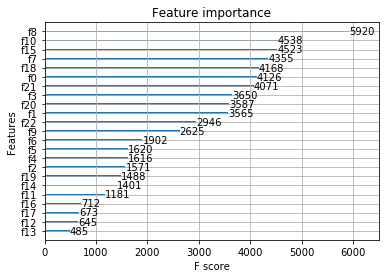

In [49]:
%matplotlib inline

xgb.plot_importance(bst)